In [89]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# configuration
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

# Part 1: Fundamentals of data visualization

> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey">For the two parts below, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask it for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc. </font>
> 
> 1. Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.
> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 
>
> Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 
>
> 
> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 
> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?
> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

In [30]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

In [31]:
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


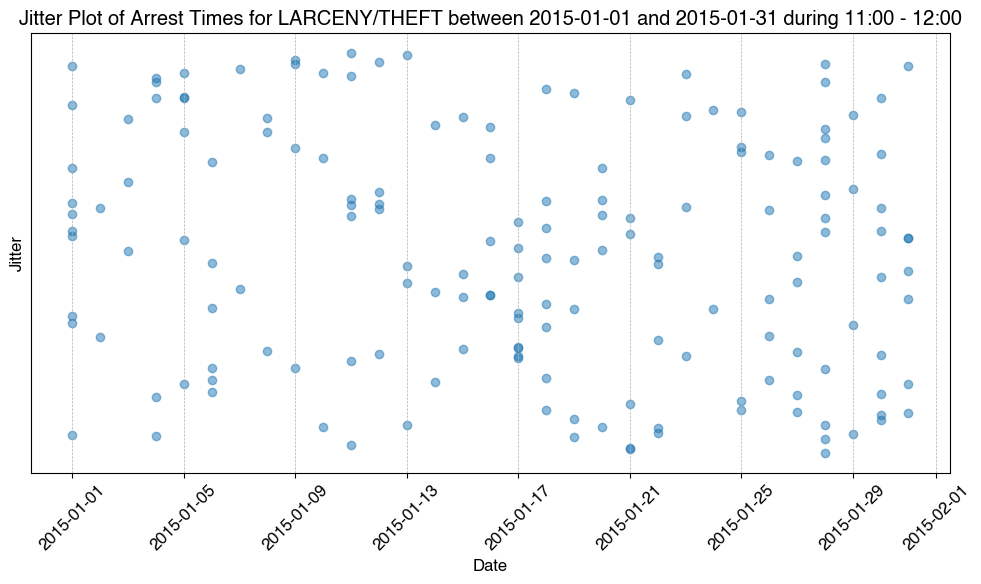

In [98]:
df['Date'] = pd.to_datetime(df['Date'])

crime_type = 'LARCENY/THEFT'
start_date = pd.to_datetime('2015-01-01').strftime(format='%Y-%m-%d')
end_date = pd.to_datetime('2015-01-31').strftime(format='%Y-%m-%d')
hour_of_interest = 11


# Filter for a specific crime_type and date range (start_date to end_date)
filtered_df = df[(df['Category'] == crime_type) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Extract hour from 'Time' and filter for the hour of interest
filtered_df['Hour'] = filtered_df['Time'].apply(lambda x: int(x.split(':')[0]))
filtered_df = filtered_df[filtered_df['Hour'] == hour_of_interest]

filtered_df['Hour'] = filtered_df['Time'].str.split(':').str[0].astype(int)
filtered_df = filtered_df.loc[filtered_df['Hour'] == hour_of_interest]

#Create jitter
jitter = np.random.uniform(-0.2, 0.2, size=len(filtered_df))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Date'], jitter, alpha=0.5)
plt.title(f"Jitter Plot of Arrest Times for {crime_type} between {start_date} and {end_date} during {hour_of_interest}:00 - {hour_of_interest+1}:00")
plt.xlabel('Date')
plt.yticks([])
plt.ylabel('Jitter')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [73]:
len(filtered_df['Date'])

1014